In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [19]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [20]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [21]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8d209d8d716c040066175d4cfde44e14


In [22]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [23]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count+=1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count+=1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%y-%m-%d %H:%M:%S")
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping....")
        pass

# Indicate that Data Loading is complete
print("----------------------------------")
print("Data Retrieval Complete           ")
print("----------------------------------")


 4 | carutapera
Processing Record 168 of Set 4 | tumannyy
City not found. Skipping....
Processing Record 169 of Set 4 | alofi
Processing Record 170 of Set 4 | arles
Processing Record 171 of Set 4 | vanavara
Processing Record 172 of Set 4 | atuona
Processing Record 173 of Set 4 | warqla
City not found. Skipping....
Processing Record 174 of Set 4 | hoshcha
Processing Record 175 of Set 4 | glace bay
Processing Record 176 of Set 4 | tuktoyaktuk
Processing Record 177 of Set 4 | dwarka
Processing Record 178 of Set 4 | ballina
Processing Record 179 of Set 4 | vohibinany
Processing Record 180 of Set 4 | bokspits
City not found. Skipping....
Processing Record 181 of Set 4 | russell
Processing Record 182 of Set 4 | malchevskaya
Processing Record 183 of Set 4 | rawson
Processing Record 184 of Set 4 | cockburn town
Processing Record 185 of Set 4 | mys shmidta
City not found. Skipping....
Processing Record 186 of Set 4 | balkhash
Processing Record 187 of Set 4 | varzob
Processing Record 188 of Set 

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,75.52,39,99,2.26,NZ,21-02-05 03:07:55
1,Nikolskoye,59.7035,30.7861,8.01,85,20,8.95,RU,21-02-05 03:08:11
2,Torbay,47.6666,-52.7314,39.20,100,90,8.05,CA,21-02-05 03:05:22
3,Adrar,20.5022,-10.0711,65.46,24,35,5.46,MR,21-02-05 03:08:28
4,Goderich,43.7501,-81.7165,30.20,86,100,20.71,CA,21-02-05 03:13:23
5,Bengkulu,-3.8004,102.2655,84.67,62,18,3.27,ID,21-02-05 03:05:32
6,Albany,42.6001,-73.9662,27.00,61,0,2.13,US,21-02-05 03:03:25
7,Mahibadhoo,3.7833,72.9667,81.25,76,100,15.55,MV,21-02-05 03:13:24
8,Ode,7.7899,5.7117,68.13,84,0,2.35,NG,21-02-05 03:13:24
9,Ushuaia,-54.8000,-68.3000,44.60,81,40,29.93,AR,21-02-05 03:08:09


In [30]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,21-02-05 03:07:55,-46.1927,168.8643,75.52,39,99,2.26
1,Nikolskoye,RU,21-02-05 03:08:11,59.7035,30.7861,8.01,85,20,8.95
2,Torbay,CA,21-02-05 03:05:22,47.6666,-52.7314,39.20,100,90,8.05
3,Adrar,MR,21-02-05 03:08:28,20.5022,-10.0711,65.46,24,35,5.46
4,Goderich,CA,21-02-05 03:13:23,43.7501,-81.7165,30.20,86,100,20.71
5,Bengkulu,ID,21-02-05 03:05:32,-3.8004,102.2655,84.67,62,18,3.27
6,Albany,US,21-02-05 03:03:25,42.6001,-73.9662,27.00,61,0,2.13
7,Mahibadhoo,MV,21-02-05 03:13:24,3.7833,72.9667,81.25,76,100,15.55
8,Ode,NG,21-02-05 03:13:24,7.7899,5.7117,68.13,84,0,2.35
9,Ushuaia,AR,21-02-05 03:08:09,-54.8000,-68.3000,44.60,81,40,29.93


In [26]:
# Create output file CSV
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

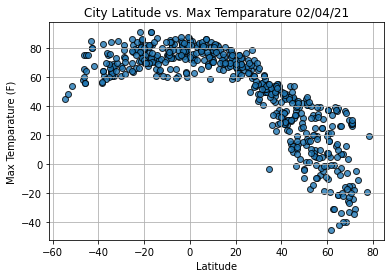

In [28]:
# Import time module
import time

# Scatter plot for latitude vs. maximum temperature
plt.scatter(lats,max_temps,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temparature " + time.strftime("%x"))
plt.ylabel("Max Temparature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data\Fig1.png")

# Show plot
plt.show()

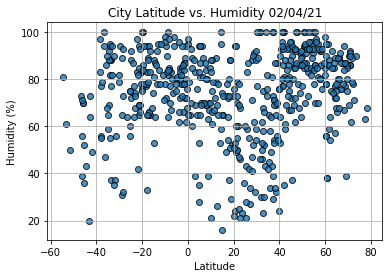

In [33]:
# Scatter plot for latitude vs. humidity
plt.scatter(lats,humidity,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data\Fig2.png")

# Show plot
plt.show()

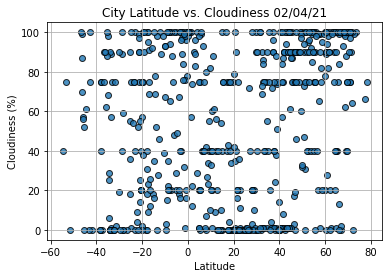

In [34]:
# Scatter plot for latitude vs. cloudiness
plt.scatter(lats,cloudiness,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data\Fig3.png")

# Show plot
plt.show()

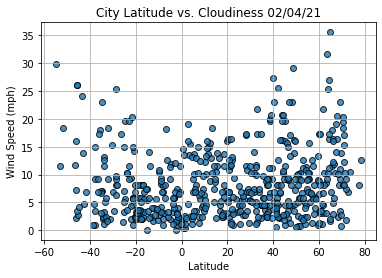

In [38]:
# Scatter plot for latitude vs. wind speed
plt.scatter(lats,wind_speed,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data\Fig4.png")

# Show plot
plt.show()

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [76]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,21-02-05 03:07:55,-46.1927,168.8643,75.52,39,99,2.26
5,Bengkulu,ID,21-02-05 03:05:32,-3.8004,102.2655,84.67,62,18,3.27
9,Ushuaia,AR,21-02-05 03:08:09,-54.8000,-68.3000,44.60,81,40,29.93
10,Bluff,NZ,21-02-05 03:04:48,-46.6000,168.3333,58.35,73,100,11.74
11,Carnarvon,AU,21-02-05 03:08:10,-24.8667,113.6333,82.40,72,75,19.57
13,Hithadhoo,MV,21-02-05 03:08:18,-0.6000,73.0833,82.45,76,100,11.54
15,Knysna,ZA,21-02-05 03:13:24,-34.0363,23.0471,60.80,82,0,2.30
17,Port Alfred,ZA,21-02-05 03:07:55,-33.5906,26.8910,66.99,88,57,1.99
18,Busselton,AU,21-02-05 03:08:13,-33.6500,115.3333,69.01,37,1,5.01
20,Chuy,UY,21-02-05 03:08:26,-33.6971,-53.4616,65.64,77,89,13.22


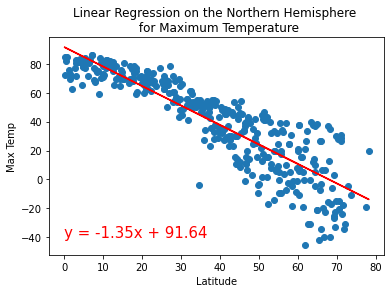

In [77]:
# Linear regression on the Northern Hemisphere for Maximum Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature","Max Temp",(0,-40))

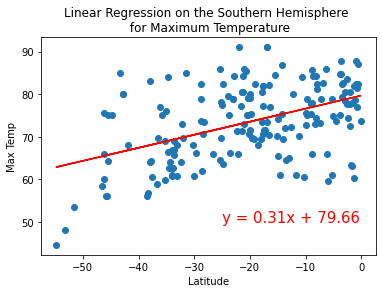

In [86]:
# Linear regression on the Southern Hemisphere for Maximum Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere \n for Maximum Temperature","Max Temp",(-25,50))

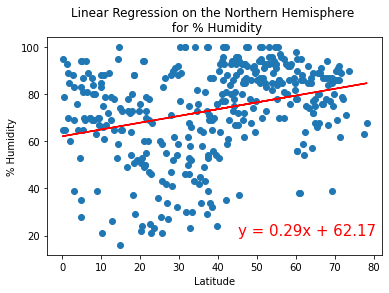

In [93]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \n for % Humidity","% Humidity",(45,20))

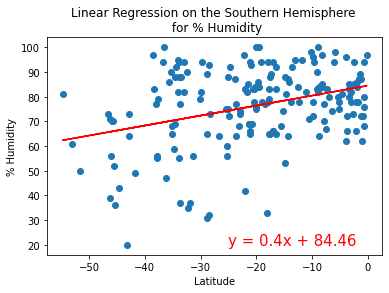

In [95]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere \n for % Humidity","% Humidity",(-25,20))

In [96]:
# Finding r-vaue for linear regression on the Southern Hemisphere for % Humidity
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.3445238614827419


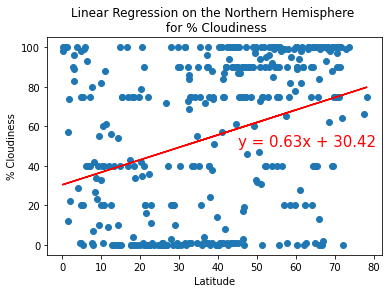

In [100]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \n for % Cloudiness","% Cloudiness",(45,50))

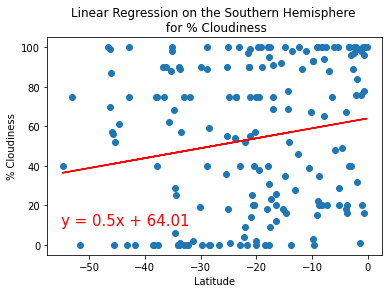

In [99]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere \n for % Cloudiness","% Cloudiness",(-55,10))

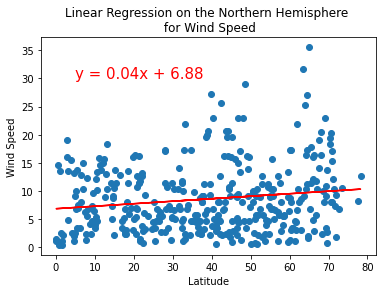

In [102]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \n for Wind Speed","Wind Speed",(5,30))

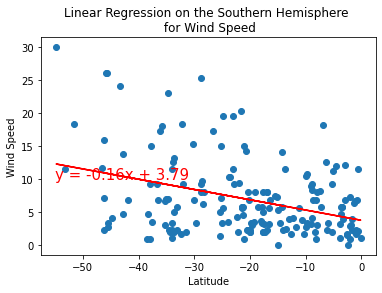

In [103]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere \n for Wind Speed","Wind Speed",(-25,25))